<h2>Subject: Computer Vision I


Group: 3
    
Authors: Angel Ontiveros, Lassi Laaksosaari
    
Excercise 3 </h2>

## Task 2

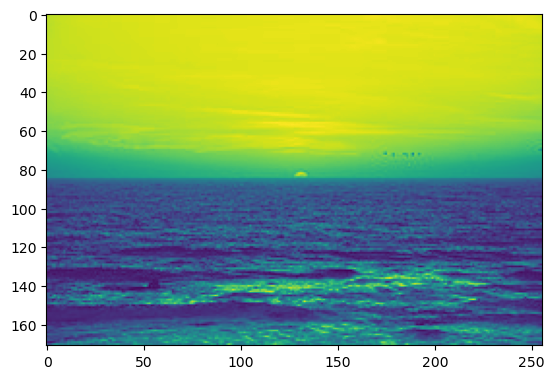

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image
from skimage.filters import sobel_h, gaussian
from sklearn.linear_model import RANSACRegressor, LinearRegression
from skimage.transform import rotate

photo_path = './yellow_horizon.jpg'

gs = rgb2gray(imread(fname=photo_path))
plt.imshow(gs)

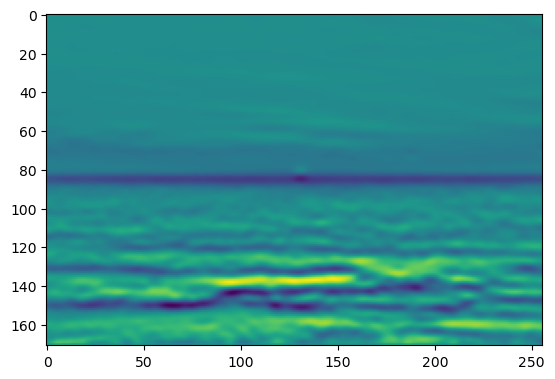

In [58]:
smoothed_gs = gaussian(gs, sigma=2)
sobel = sobel_h(smoothed_gs)
plt.imshow(sobel)

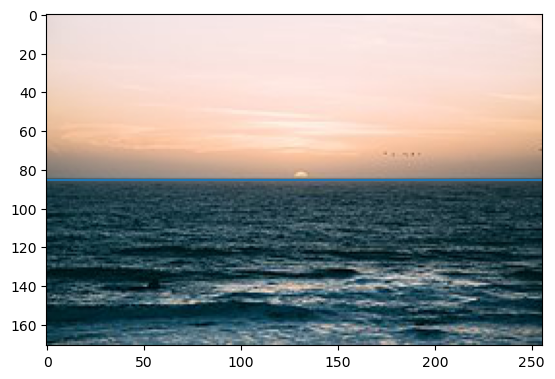

In [59]:
# Find y coordinates of minimum intensity pixels on 20 equidistant vertical lines
y_coordinates = np.argmin(sobel, axis=0)[0::13]

ransac = RANSACRegressor(LinearRegression())

# Reshape to 2d arrays
x_coordinates = np.arange(0,256,13).reshape(-1,1)
y_coordinates = y_coordinates.reshape(-1,1)

ransac.fit(x_coordinates, y_coordinates)
line_x_coordinates = np.arange(0,256).reshape(-1,1)
ransac_y_coordinates = ransac.predict(line_x_coordinates)
plt.imshow(imread(fname=photo_path))
plt.plot(line_x_coordinates, ransac_y_coordinates)
plt.show()

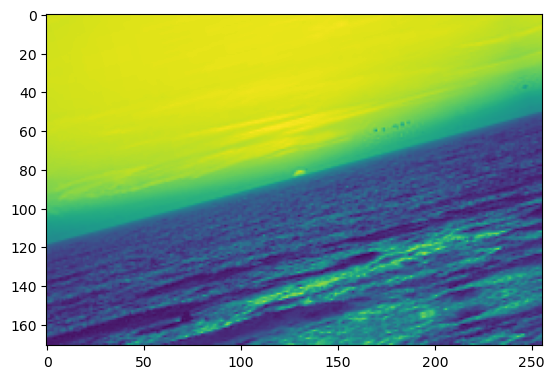

In [60]:
gs_rotated = rotate(rgb2gray(imread(fname=photo_path)), angle=15, mode='reflect')
plt.imshow(gs_rotated)

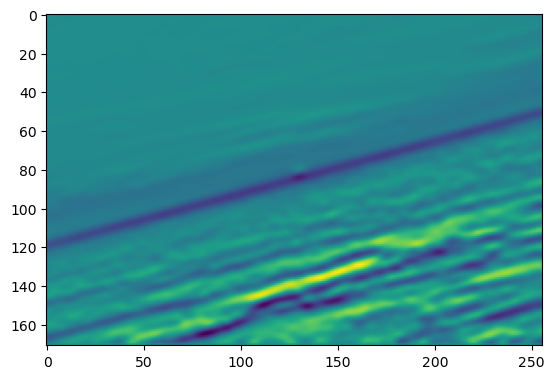

In [61]:
smoothed_gs_rotated = gaussian(gs_rotated, sigma=2)
sobel_rotated = sobel_h(smoothed_gs_rotated)
plt.imshow(sobel_rotated)

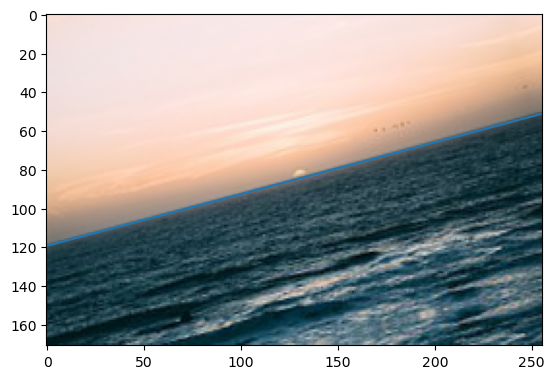

In [62]:
# Find y coordinates of minimum intensity pixels on 20 equidistant vertical lines
y_coordinates = np.argmin(sobel_rotated, axis=0)[0::13]

ransac = RANSACRegressor(LinearRegression())

# Reshape to 2d arrays
x_coordinates = np.arange(0,256,13).reshape(-1,1)
y_coordinates = y_coordinates.reshape(-1,1)

ransac.fit(x_coordinates, y_coordinates)
line_x_coordinates = np.arange(0,256).reshape(-1,1)
ransac_y_coordinates = ransac.predict(line_x_coordinates)
plt.imshow(rotate(imread(fname=photo_path), angle=15, mode='reflect'))
plt.plot(line_x_coordinates, ransac_y_coordinates)
plt.show()